In [2]:
import pandas as pd

In [3]:
final = pd.read_csv("../data/processed/full_patient_dataset.csv")

In [4]:
final.head()

,RIDRETH3,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDFMPIR,SEQN,BMXBMI,BPXSY1,...,num_meds,any_med_use,ALQ101,ALQ130,BPQ020,BPQ030,DIQ010,DIQ160,PAQ650,SMQ020
0,4,1,69,3.0,4.0,3,0.84,73557,26.7,122.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
1,3,1,54,3.0,1.0,4,1.78,73558,28.6,156.0,...,4.0,1,1.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0
2,3,1,72,4.0,1.0,2,4.51,73559,28.9,140.0,...,5.0,1,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
3,3,1,9,4.0,1.0,4,2.52,73560,17.1,108.0,...,0.0,0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,3,2,73,5.0,1.0,2,5.00,73561,19.7,136.0,...,4.0,1,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0


In [5]:
final = final.drop(columns = "SEQN")

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RIDRETH3     9813 non-null   int64  
 1   RIAGENDR     9813 non-null   int64  
 2   RIDAGEYR     9813 non-null   int64  
 3   DMDEDUC2     9813 non-null   float64
 4   DMDMARTL     9813 non-null   float64
 5   DMDHHSIZ     9813 non-null   int64  
 6   INDFMPIR     9813 non-null   float64
 7   BMXBMI       9813 non-null   float64
 8   BPXSY1       9813 non-null   float64
 9   BPXDI1       9813 non-null   float64
 10  LBDLDL       9813 non-null   float64
 11  LBXTC        9813 non-null   float64
 12  DR1TKCAL     9813 non-null   float64
 13  DR1TPROT     9813 non-null   float64
 14  DR1TCARB     9813 non-null   float64
 15  DR1TSUGR     9813 non-null   float64
 16  DR1TTFAT     9813 non-null   float64
 17  DR1TSODI     9813 non-null   float64
 18  DR1TFIBE     9813 non-null   float64
 19  DR1TCH

In [7]:
final["RIAGENDR"] = final["RIAGENDR"].map({1:0, 2:1})

In [8]:
final = pd.get_dummies(
    final,
    columns = ["RIDRETH3", "DMDMARTL"],
    drop_first = True
)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_final = scaler.fit_transform(final)

scaled_df_final = pd.DataFrame(scaled_final, columns = final.columns)
scaled_df_final.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,LBDLDL,LBXTC,...,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
0,-1.015508,1.531807,-0.757038,-0.510511,-0.869447,0.143520,0.287286,0.482300,-0.051647,-0.318788,...,1.861320,-0.340403,-0.217436,-0.210667,-0.263035,7.421205,-0.348916,-0.207214,-0.014278,-0.010095
1,-1.015508,0.916959,-0.757038,0.069309,-0.272224,0.392024,2.483279,-0.299621,-0.051647,-0.235790,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
2,-1.015508,1.654776,0.284579,-1.090330,1.462267,0.431261,1.449871,1.889756,-2.433174,-1.453100,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
3,-1.015508,-0.927582,0.284579,0.069309,0.197931,-1.112078,-0.616946,-2.176229,-0.051647,-0.291122,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
4,0.984729,1.695766,1.326196,-1.090330,1.773585,-0.772020,1.191519,1.576988,-0.152988,0.621861,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095


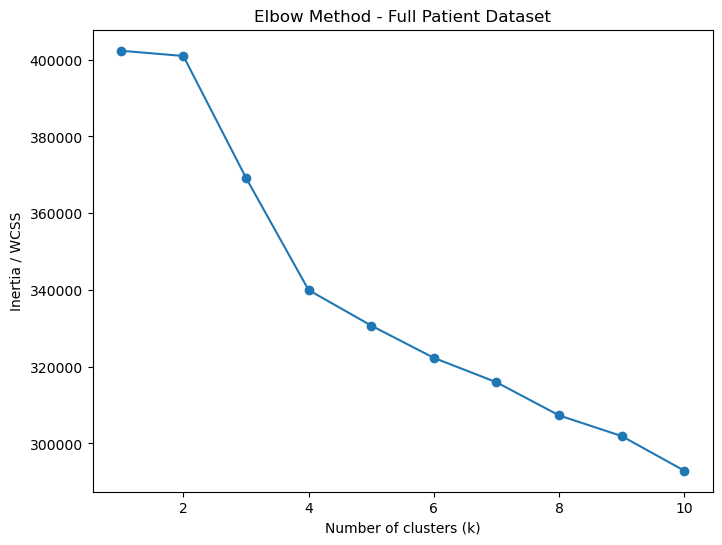

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_final = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_df_final)
    inertia_final.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1,11), inertia_final, marker = 'o')
plt.title("Elbow Method - Full Patient Dataset")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia / WCSS")
plt.show()

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 7):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(scaled_df_final)
    score = silhouette_score(scaled_df_final, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.5554967497945422
k=3, silhouette score=0.15370640115819859
k=4, silhouette score=0.1411446363013237
k=5, silhouette score=0.1012932211425012
k=6, silhouette score=0.10563515593888595


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

X_final = scaled_df_final

kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_final)
kmeans_sil = silhouette_score(X_final, kmeans_labels)
print("KMeans Silhouette Score: ", kmeans_sil)

agg = AgglomerativeClustering(n_clusters = 2)
agg_labels = agg.fit_predict(X_final)
agg_sil = silhouette_score(X_final, agg_labels)
print("Agglomerative Silhouette Score: ", agg_sil)

gmm = GaussianMixture(n_components = 2, random_state = 42)
gmm_labels = gmm.fit_predict(X_final)
gmm_sil = silhouette_score(X_final, gmm_labels)
print("Gaussian Silhouette Score: ", gmm_sil)

KMeans Silhouette Score:  0.5554967497945422
Agglomerative Silhouette Score:  0.09082095230927124
Gaussian Silhouette Score:  0.5554967497945422


In [13]:
scaled_df_final["Cluster"] = kmeans_labels
scaled_df_final["Cluster"].value_counts()

Cluster
1    9808
0       5
Name: count, dtype: int64

In [14]:
scaled_df_final["Cluster"] = gmm_labels
scaled_df_final["Cluster"].value_counts()

Cluster
1    9808
0       5
Name: count, dtype: int64

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = scaled_df_final.drop(columns=["Cluster"], errors = "ignore")

for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette score = {score}")

k=2, silhouette score = 0.5554967497945422
k=3, silhouette score = 0.15370640115819859
k=4, silhouette score = 0.1411446363013237
k=5, silhouette score = 0.1012932211425012
k=6, silhouette score = 0.10563515593888595
k=7, silhouette score = 0.0666410746256765
k=8, silhouette score = 0.08598234197184797
k=9, silhouette score = 0.03863706023144168


In [16]:
X = scaled_df_final.drop(columns = ["Cluster"], errors = "ignore")
X.shape

(9813, 41)

In [17]:
from sklearn.decomposition import PCA

X = scaled_df_final.drop(columns=["Cluster"], errors = "ignore")
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

X_pca.shape

(9813, 32)

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette score = {score}")

k=2, silhouette score = 0.5594928378032382
k=3, silhouette score = 0.1569684030126269
k=4, silhouette score = 0.14787938067972925
k=5, silhouette score = 0.15623138687224059
k=6, silhouette score = 0.11446151733473067
k=7, silhouette score = 0.11809764909796527
k=8, silhouette score = 0.12620103154512485
k=9, silhouette score = 0.1142954733993165


In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

X = X_pca

results = {}

kmeans = KMeans(n_clusters = 2, random_state = 42)
labels_kmeans = kmeans.fit_predict(X)
results["KMeans"] = silhouette_score(X, labels_kmeans)

agg = AgglomerativeClustering(n_clusters = 2)
labels_agg = agg.fit_predict(X)
results["Agglomerative"] = silhouette_score(X, labels_agg)

gmm = GaussianMixture(n_components = 2, random_state = 42)
labels_gmm = gmm.fit_predict(X)
results["Gaussian"] = silhouette_score(X, labels_gmm)

dbscan = DBSCAN(eps = 1.0, min_samples = 10)
labels_dbscan = dbscan.fit_predict(X)
if len(set(labels_dbscan)) > 1:
    results["DBSCAN"] = silhouette_score(X, labels_dbscan)
else:
    results["DBSCAN"] = "Only 1 Cluster formed"

results

{'KMeans': 0.5594928378032382,
 'Agglomerative': 0.08926008053353267,
 'Gaussian': 0.5594928378032382,
 'DBSCAN': -0.30281655852322226}

In [20]:
from sklearn.mixture import GaussianMixture

gmm_final = GaussianMixture(n_components = 2, random_state = 42)
final_labels = gmm_final.fit_predict(X_pca)

scaled_df_final["Cluster"] = final_labels
scaled_df_final["Cluster"].value_counts()

Cluster
1    9808
0       5
Name: count, dtype: int64

In [21]:
scaled_df_final.shape

(9813, 42)

In [23]:
import os 
import warnings

warnings.filterwarnings("ignore")
os.environ["OMP_NUM_THREADS"] = "1"

In [25]:
import umap.umap_ as umap

X = scaled_df_final.drop(columns = ["Cluster"], errors = "ignore")

umap_model = umap.UMAP(
    n_neighbors = 30,
    min_dist = 0.1,
    n_components = 2,
    random_state = 42
)
X_umap = umap_model.fit_transform(X)

In [27]:
X_umap.shape

(9813, 2)

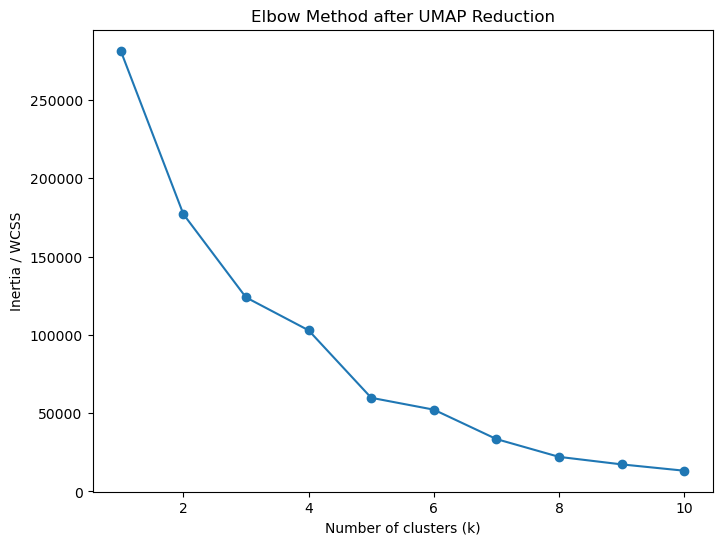

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_umap = []

for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(X_umap)
    inertia_umap.append(km.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1,11), inertia_umap, marker = 'o')
plt.title("Elbow Method after UMAP Reduction")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia / WCSS")
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    km = KMeans(n_clusters = k, random_state = 42)
    labels = km.fit_predict(X_umap)
    score = silhouette_score(X_umap, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.32501697540283203
k=3, silhouette score=0.39886972308158875
k=4, silhouette score=0.3833693861961365
k=5, silhouette score=0.44659537076950073
k=6, silhouette score=0.4401610791683197
k=7, silhouette score=0.5256649851799011
k=8, silhouette score=0.5550580024719238
k=9, silhouette score=0.586315393447876


In [35]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

X = X_umap

results = {}

kmeans = KMeans(n_clusters = 9, random_state = 42)
labels_kmeans = kmeans.fit_predict(X)
results["KMeans"] = silhouette_score(X, labels_kmeans)

agg = AgglomerativeClustering(n_clusters = 9)
labels_agg = agg.fit_predict(X)
results["Agglomerative"] = silhouette_score(X, labels_agg)

gmm = GaussianMixture(n_components = 9, random_state = 42)
labels_gmm = gmm.fit_predict(X)
results["Gaussian"] = silhouette_score(X, labels_gmm)

dbscan = DBSCAN(eps = 0.5, min_samples = 10)
labels_dbscan = dbscan.fit_predict(X)
if len(set(labels_dbscan)) > 1:
    results["DBSCAN"] = silhouette_score(X, labels_dbscan)
else:
    results["DBSCAN"] = "Only 1 cluster formed"

results

{'KMeans': 0.586315393447876,
 'Agglomerative': 0.5582760572433472,
 'Gaussian': 0.5859097838401794,
 'DBSCAN': 0.4864434599876404}

In [43]:
kmeans = KMeans(n_clusters = 9, random_state = 42)
final_labels_umap = kmeans.fit_predict(X_umap)

scaled_df_final["Cluster"] = final_labels_umap
scaled_df_final["Cluster"].value_counts()

Cluster
0    2771
1    2192
6    1216
3     909
5     797
2     754
8     590
4     414
7     170
Name: count, dtype: int64

In [44]:
final["Cluster"] = final_labels_umap

In [45]:
cluster_profile = final.groupby("Cluster").mean().T
cluster_profile

Cluster,0,1,2,3,4,5,6,7,8
RIAGENDR,0.452905,0.506387,0.510610,0.506051,0.760870,0.485571,0.485197,0.629412,0.632203
RIDAGEYR,47.485384,11.596259,24.209549,30.712871,72.246377,27.488080,12.019737,49.052941,54.974576
DMDEDUC2,3.512450,4.004106,3.677719,4.071507,3.103865,3.599749,3.981086,2.852941,3.571186
DMDHHSIZ,3.311440,4.726277,4.391247,3.935094,2.099034,4.220828,4.493421,3.100000,2.425424
INDFMPIR,2.514562,2.016086,1.922168,3.086540,2.037742,1.983563,1.755580,1.557824,2.043136
BMXBMI,29.816420,21.724772,24.422414,22.736524,28.971256,26.198243,21.716859,30.145294,29.675593
BPXSY1,122.830025,111.081204,114.549072,115.498350,132.405797,116.619824,111.980263,121.858824,124.884746
BPXDI1,69.486106,62.606752,64.877984,66.809681,65.777778,66.401506,59.398026,71.811765,71.169492
LBDLDL,107.338506,100.010493,105.078249,103.737074,104.347826,103.969887,101.315789,109.370588,106.271186
LBXTC,188.386864,164.842609,178.208223,181.619362,186.833333,177.673777,168.074013,190.241176,192.123729


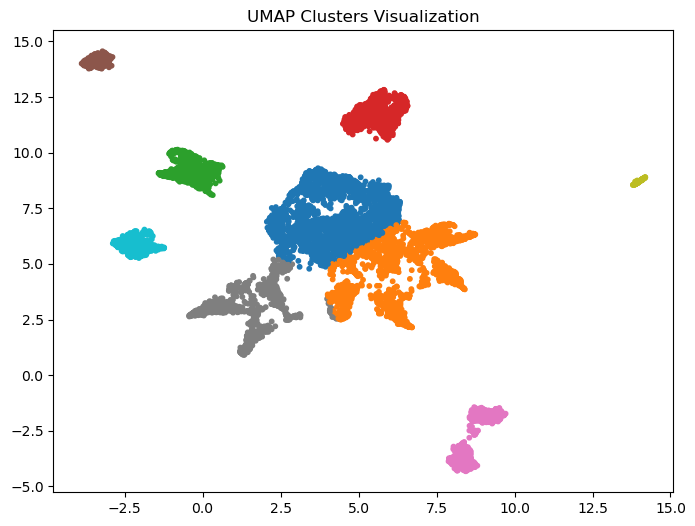

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c = final_labels_umap, cmap = "tab10", s = 10)
plt.title("UMAP Clusters Visualization")
plt.show()

In [48]:
final.to_csv("../data/processed/umap_clustered_dataset.csv", index = "False")

In [64]:
cluster_names = {
    0: "Middle-aged Metabolic Risk",
    1: "Healthy Youth",
    2: "Young Lifestyle Shift",
    3: "Fit Adults",
    4: "Elderly Chronic Condition",
    5: "High Sugar/Fat Consumers",
    6: "Unhealthy Youth",
    7: "Alcohol associated Metabolic Risk",
    8: "Order Moderate Risk"
}

In [65]:
final["Cluster_Name"] = final["Cluster"].map(cluster_names)

In [66]:
final[["Cluster", "Cluster_Name"]].head()

,Cluster,Cluster_Name
0,7,Alcohol associated Metabolic Risk
1,0,Middle-aged Metabolic Risk
2,0,Middle-aged Metabolic Risk
3,1,Healthy Youth
4,0,Middle-aged Metabolic Risk


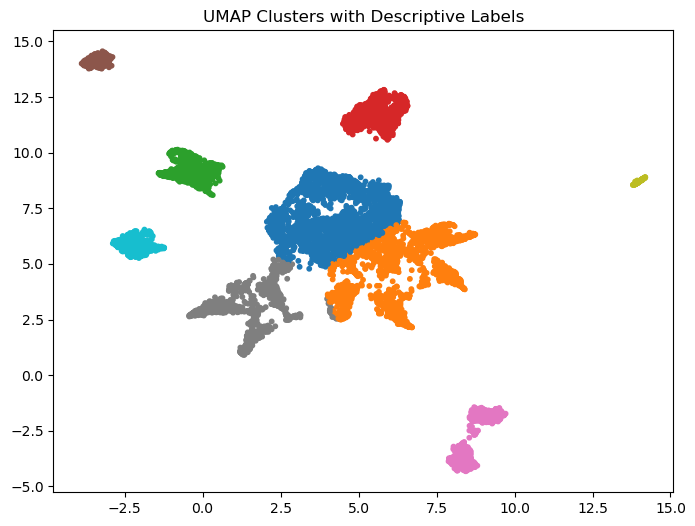

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0],X_umap[:, 1], c = final["Cluster"], cmap = "tab10", s = 10)
for i, txt in enumerate(final["Cluster_Name"]):
    pass
plt.title("UMAP Clusters with Descriptive Labels")
plt.show()

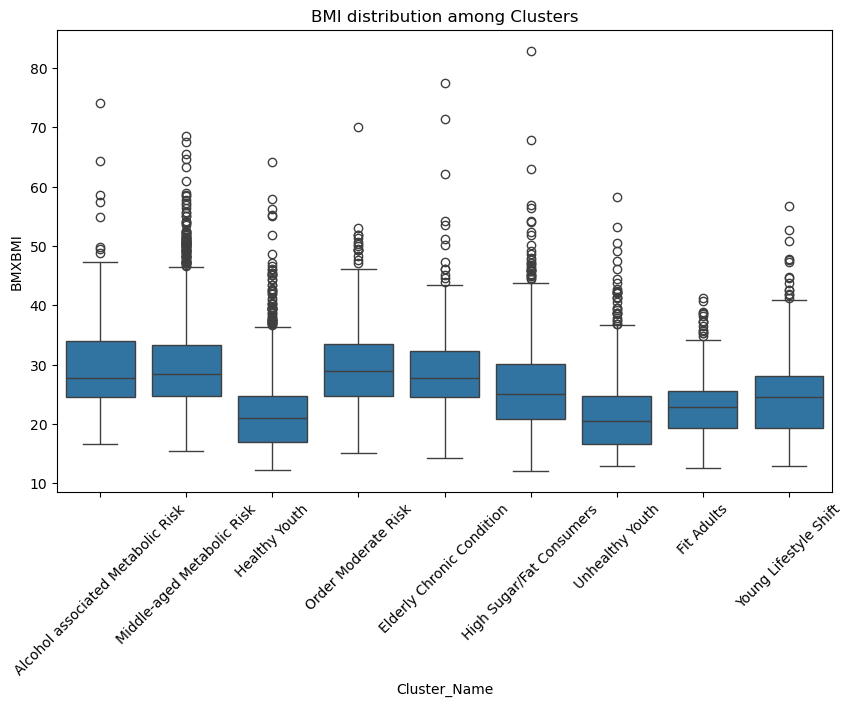

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x = final["Cluster_Name"], y = final["BMXBMI"])
plt.xticks(rotation = 45)
plt.title("BMI distribution among Clusters")
plt.show()

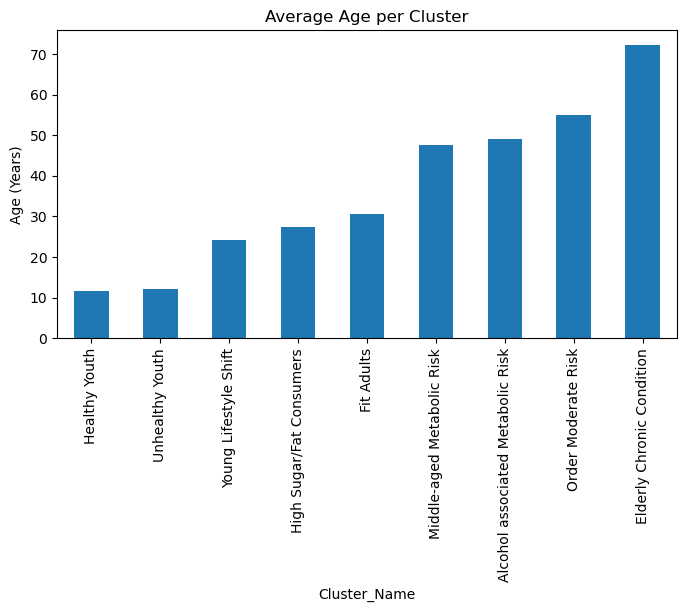

In [69]:
cluster_age = final.groupby("Cluster_Name")["RIDAGEYR"].mean().sort_values()
cluster_age.plot(kind = "bar", figsize=(8,4), title = "Average Age per Cluster")
plt.ylabel("Age (Years)")
plt.show()

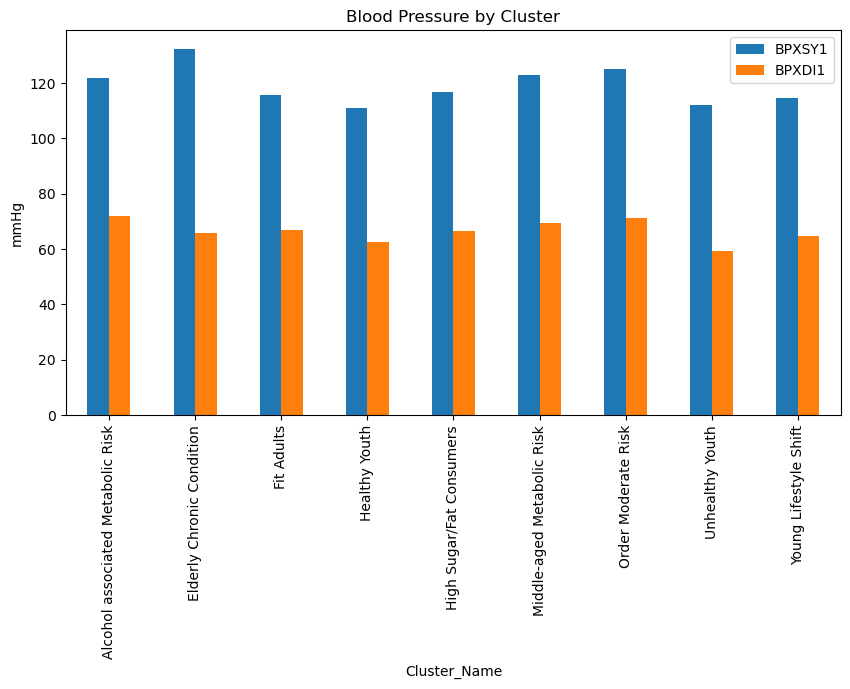

In [70]:
bp_compare = final.groupby("Cluster_Name")[["BPXSY1", "BPXDI1"]].mean()
bp_compare.plot(kind = "bar", figsize = (10,5), title = "Blood Pressure by Cluster")
plt.ylabel("mmHg")
plt.show()

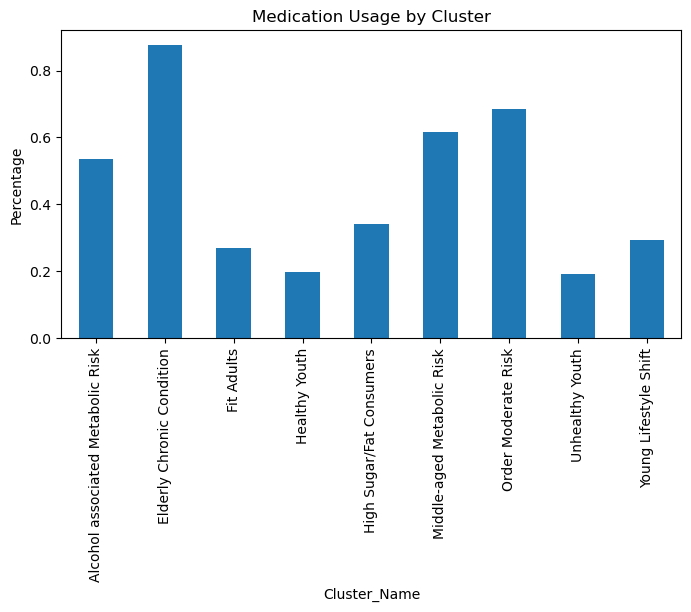

In [71]:
final.groupby("Cluster_Name")["any_med_use"].mean().plot(
    kind = "bar", figsize=(8,4), title = "Medication Usage by Cluster"
)
plt.ylabel("Percentage")
plt.show()

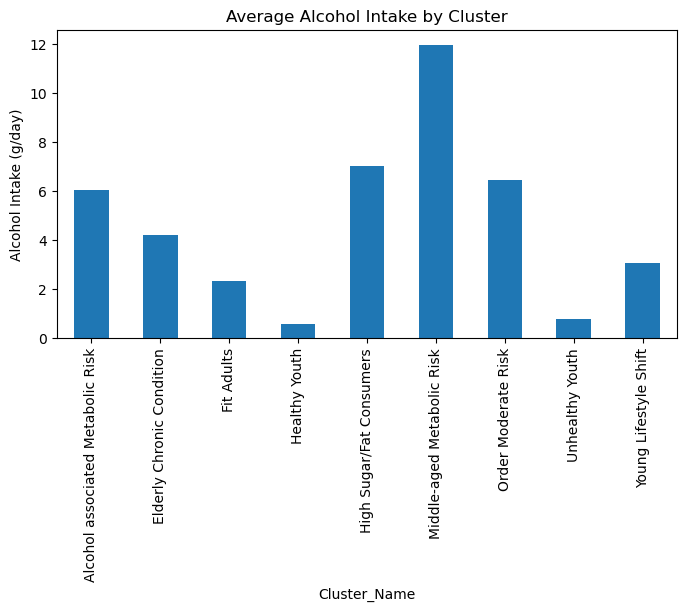

In [72]:
final.groupby("Cluster_Name")["DR1TALCO"].mean().plot(
    kind="bar", figsize=(8,4), title = "Average Alcohol Intake by Cluster"
)
plt.ylabel("Alcohol Intake (g/day)")
plt.show()

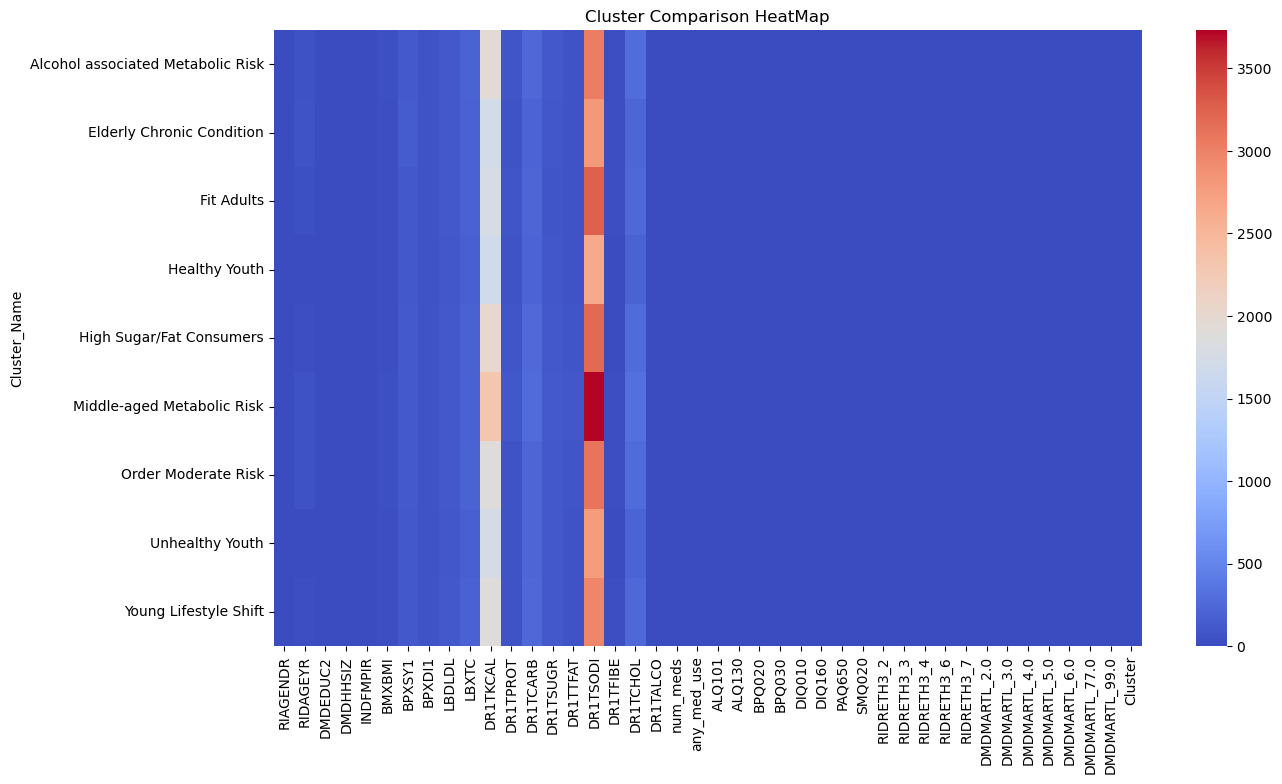

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_means = final.groupby("Cluster_Name").mean()

plt.figure(figsize=(14,8))
sns.heatmap(cluster_means, cmap = "coolwarm", annot = False)
plt.title("Cluster Comparison HeatMap")
plt.show()

In [74]:
final.to_csv("../data/processed/full_patient_dataset_with_clusters.csv")